In [2]:
import numpy as np
import torch
import pandas as pd

import matplotlib.pyplot as plt

from collections import namedtuple
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import data_processing as dp
import rnn_classifier_torch as ac
import model_utilities_torch as mu 
import evaluation as ev
import vocab as vo

In [4]:
vocab, all_labels, sents, labels = dp.load_problem(lang='ru')

In [5]:
!python -c "import torch; print(torch.cuda.is_available(), torch.cuda.device_count())"

True 1


In [6]:
!pwd

/media/itasarom/7158f0d7-af1d-45d4-855f-86204aed5a8b/Projects/diplom/simple_classifier


In [7]:
torch.cuda.is_available()

True

In [8]:
torch.cuda.device_count()

1

In [9]:
import os
os.environ["LD_LIBRARY_PATH"]

'/usr/local/cuda-9.0/lib64::/usr/lib/x86_64-linux-gnu:/usr/local/lib:/usr/local/cuda/lib64:/usr/lib/x86_64-linux-gnu:/usr/lib/nvidia-387'

In [10]:
import sys
sys.executable

'/home/itasarom/.programs/anaconda2/envs/torch/bin/python'

In [11]:
sys.argv[0]

'/home/itasarom/.programs/anaconda2/envs/torch/lib/python3.5/site-packages/ipykernel/__main__.py'

In [12]:
# vocab.embeddings.dtype

In [13]:
batch_sampler = vo.BatchSampler(sents=sents, labels=labels, vocab=vocab, all_labels=all_labels, batch_size=128)

In [27]:
del cls
import gc
gc.collect()
torch.cuda.empty_cache()

In [47]:
cls = ac.RnnClassifier(vocab, n_topics=len(all_labels))

In [48]:
cls = cls.cuda()

In [18]:
cls

RnnClassifier(
  (word_embeddings): Embedding(176032, 100)
  (rnn_cell): LSTM(100, 128, batch_first=True)
  (dense): Linear(in_features=128, out_features=256)
  (logits_layer): Linear(in_features=256, out_features=26)
  (softmax_layer): Softmax()
  (loss_function): CrossEntropyLoss(
  )
)

In [49]:
trainer = mu.Trainer(cls)

In [51]:
trainer.restore("./checkpoints/checkpoint.ckpt")

In [45]:
trainer.train(batch_sampler=batch_sampler, n_epochs=200, max_iterations=10**5, save_path="./checkpoints/checkpoint.ckpt", save_every=10)


0it [00:00, ?it/s]
2it [00:00, 13.19it/s]

Starting epoch  0



4it [00:00, 13.24it/s]
6it [00:00, 12.99it/s]
8it [00:00, 12.98it/s]
10it [00:00, 12.97it/s]
12it [00:00, 13.00it/s]
14it [00:01, 13.02it/s]
16it [00:01, 12.87it/s]
18it [00:01, 12.92it/s]
20it [00:01, 12.83it/s]
22it [00:01, 12.87it/s]
24it [00:01, 12.86it/s]
26it [00:02, 12.86it/s]
28it [00:02, 12.86it/s]
30it [00:02, 12.90it/s]
32it [00:02, 12.85it/s]
34it [00:02, 12.84it/s]
36it [00:02, 12.88it/s]
38it [00:02, 12.87it/s]
40it [00:03, 12.90it/s]
42it [00:03, 12.92it/s]
44it [00:03, 12.92it/s]
46it [00:03, 12.92it/s]
Exception in thread Thread-9:
Traceback (most recent call last):
  File "/home/itasarom/.programs/anaconda2/envs/torch/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/itasarom/.programs/anaconda2/envs/torch/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/itasarom/.programs/anaconda2/envs/torch/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemre

After epoch 0 validation_loss = 1.0450953245162964, train_loss = 0.7885323762893677
Starting epoch  1


308it [00:24, 12.59it/s]
2it [00:00, 13.33it/s]

After epoch 1 validation_loss = 1.0016415119171143, train_loss = 0.7602207064628601
Starting epoch  2


308it [00:23, 12.89it/s]
2it [00:00, 13.05it/s]

After epoch 2 validation_loss = 0.9542332887649536, train_loss = 0.7338666915893555
Starting epoch  3


308it [00:23, 13.05it/s]
2it [00:00, 13.73it/s]

After epoch 3 validation_loss = 0.9174960255622864, train_loss = 0.7120638489723206
Starting epoch  4


308it [00:23, 12.90it/s]
2it [00:00, 13.16it/s]

After epoch 4 validation_loss = 0.8883177042007446, train_loss = 0.6824063658714294
Starting epoch  5


308it [00:23, 12.84it/s]
2it [00:00, 13.86it/s]

After epoch 5 validation_loss = 0.8510343432426453, train_loss = 0.663198709487915
Starting epoch  6


308it [00:24, 12.80it/s]
2it [00:00, 13.36it/s]

After epoch 6 validation_loss = 0.8015474677085876, train_loss = 0.6498702168464661
Starting epoch  7


308it [00:23, 12.99it/s]
2it [00:00, 13.60it/s]

After epoch 7 validation_loss = 0.7942966818809509, train_loss = 0.6319759488105774
Starting epoch  8


308it [00:23, 12.92it/s]
2it [00:00, 12.51it/s]

After epoch 8 validation_loss = 0.8278712034225464, train_loss = 0.6086879372596741
Starting epoch  9


308it [00:24, 12.68it/s]


After epoch 9 validation_loss = 0.7238699793815613, train_loss = 0.583816409111023


2it [00:00, 13.58it/s]

Starting epoch  10


308it [00:24, 12.83it/s]
2it [00:00, 12.27it/s]

After epoch 10 validation_loss = 0.7105193734169006, train_loss = 0.5570404529571533
Starting epoch  11


308it [00:23, 12.96it/s]
2it [00:00, 13.89it/s]

After epoch 11 validation_loss = 0.6589584946632385, train_loss = 0.5483030676841736
Starting epoch  12


138it [00:10, 12.72it/s]

KeyboardInterrupt: 

In [31]:
cls

RnnClassifier(
  (word_embeddings): Embedding(176032, 100)
  (rnn_cell): LSTM(100, 128, batch_first=True)
  (dense): Linear(in_features=128, out_features=256)
  (logits_layer): Linear(in_features=256, out_features=26)
  (softmax_layer): Softmax()
  (loss_function): CrossEntropyLoss(
  )
)

In [32]:
x, mask, y = batch_sampler.get_test()

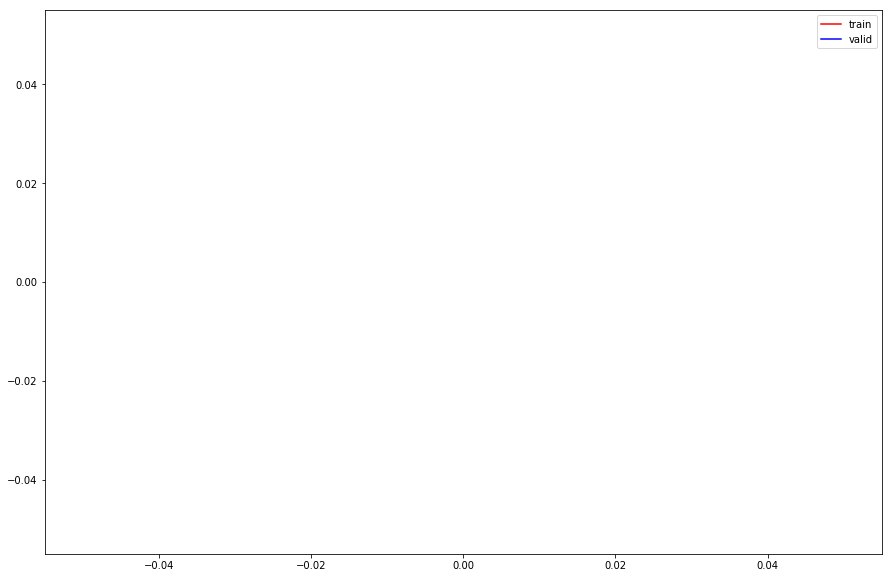

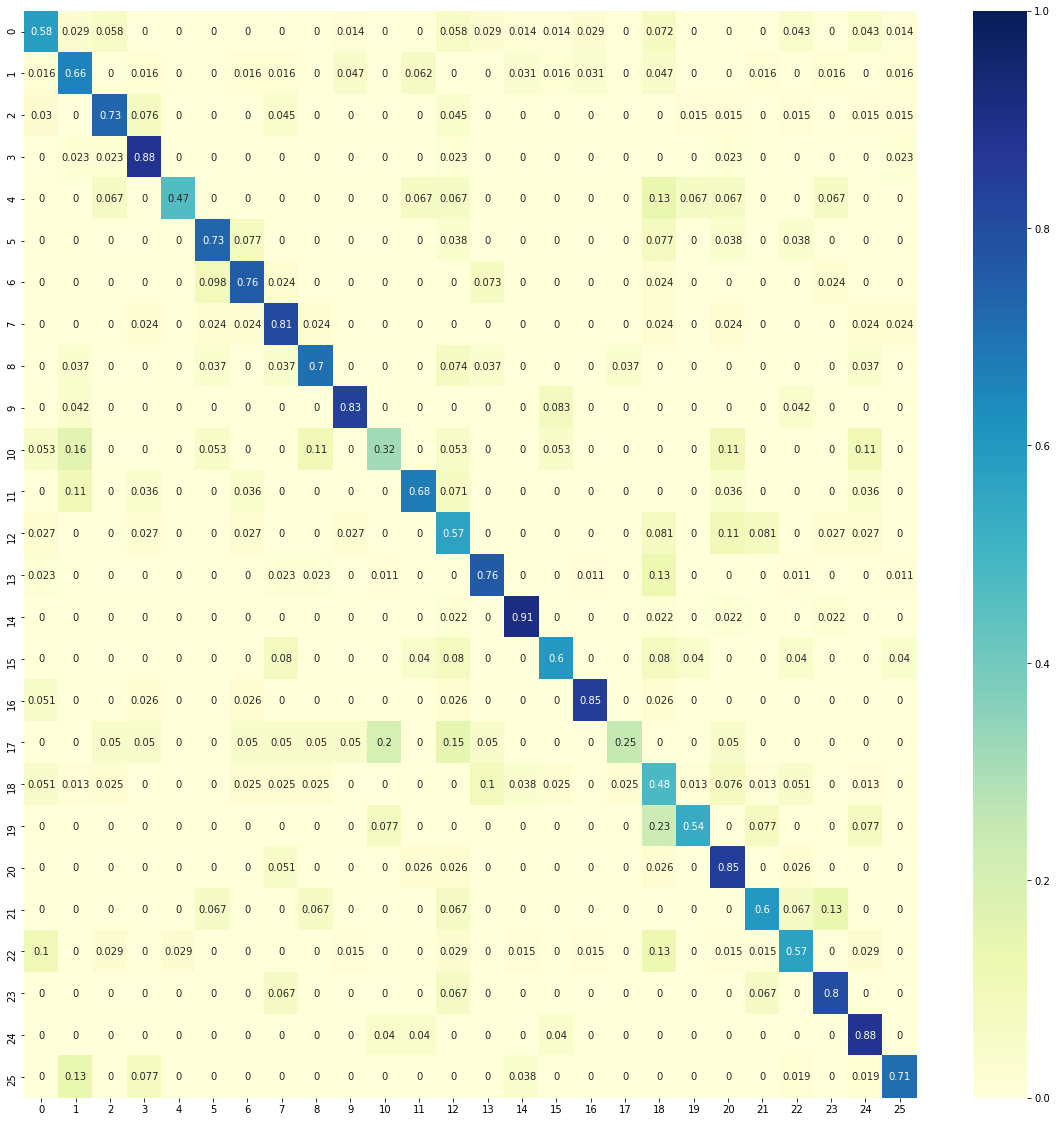

In [52]:
res = ev.describe(trainer, x, mask, y)

In [42]:
res

((722, 1024, 0.705078125),
 {0: (50, 88, 0.5681818181818182),
  1: (42, 66, 0.6363636363636364),
  2: (52, 66, 0.7878787878787878),
  3: (36, 42, 0.8571428571428571),
  4: (10, 13, 0.7692307692307693),
  5: (23, 34, 0.6764705882352942),
  6: (31, 42, 0.7380952380952381),
  7: (33, 42, 0.7857142857142857),
  8: (19, 27, 0.7037037037037037),
  9: (19, 25, 0.76),
  10: (6, 11, 0.5454545454545454),
  11: (15, 19, 0.7894736842105263),
  12: (16, 35, 0.45714285714285713),
  13: (72, 95, 0.7578947368421053),
  14: (42, 53, 0.7924528301886793),
  15: (18, 26, 0.6923076923076923),
  16: (32, 34, 0.9411764705882353),
  17: (9, 21, 0.42857142857142855),
  18: (33, 57, 0.5789473684210527),
  19: (10, 15, 0.6666666666666666),
  20: (24, 34, 0.7058823529411765),
  21: (10, 20, 0.5),
  22: (46, 61, 0.7540983606557377),
  23: (12, 17, 0.7058823529411765),
  24: (22, 35, 0.6285714285714286),
  25: (40, 46, 0.8695652173913043)},
 {0: (50, 69, 0.7246376811594203),
  1: (42, 64, 0.65625),
  2: (52, 66, 0.

In [172]:
# batch_sampler.sents[0]

In [13]:
vocab.transformation

{'юмористическое': 97279,
 'antvr': 117037,
 'видятся': 70454,
 'бензиновым': 42506,
 'передышка': 84835,
 'асуров': 106613,
 'формированиях': 91768,
 'beads': 101058,
 'декады': 78772,
 'опровергали': 160438,
 'злостного': 58964,
 'побудило': 75897,
 'оккупационными': 158400,
 'правдоподобия': 136517,
 'иллюминатора': 104619,
 'ослик': 64485,
 'мини': 2369,
 'витает': 45503,
 'броско': 142746,
 'слой': 3080,
 'расстраивать': 83501,
 'боезапасом': 138432,
 'проектной': 16554,
 'отвар': 17070,
 'форго': 147138,
 'спреями': 165886,
 'асперо': 159595,
 'обяжут': 94070,
 'возбуждения': 17893,
 'готовым': 14569,
 'дюссельдорф': 108463,
 'торфяных': 54488,
 'бычки': 64035,
 'заявлением': 11966,
 'предоставлены': 23318,
 'ласковая': 61982,
 'отвод': 66347,
 'ретросклеропломбирование': 98681,
 'билал': 162546,
 'засветкой': 117957,
 'избил': 21797,
 'обиняков': 85647,
 'карантине': 49844,
 'комментировали': 63422,
 'характеру': 21940,
 'ихеаначо': 111350,
 'пересмотр': 35790,
 'непрозрачные': 